In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,NaN
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  1
dtype: int64

In [5]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                   999
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.iloc[:, -3:].skew()

math score      -0.277747
reading score   -0.258414
writing score   -0.288249
dtype: float64

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

In [10]:
def resolveOutliners(df, numeric_columns):
    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_columns = df.columns[-3:]
df = resolveOutliners(df, numeric_columns)

In [11]:
import numpy as np

<Axes: xlabel='writing score', ylabel='Count'>

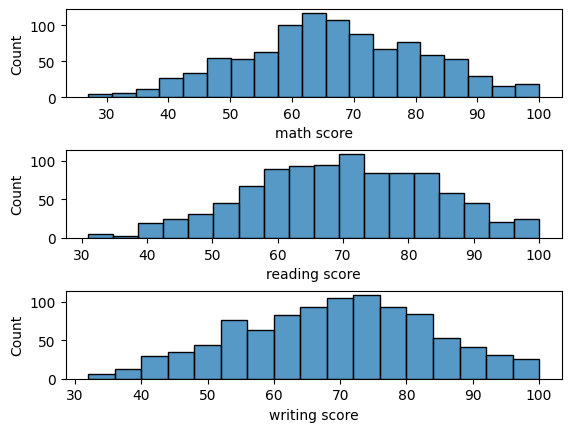

In [12]:
fig, axes = plt.subplots(3)
plt.subplots_adjust(hspace=0.6)
sn.histplot(df['math score'], ax=axes[0])
sn.histplot(df['reading score'], ax=axes[1])
sn.histplot(df['writing score'], ax=axes[2])

In [13]:
df['math score'] = np.square(df['math score'])
df['reading score'] = np.square(df['reading score'])
df['writing score'] = np.square(df['writing score'])

<Axes: xlabel='writing score', ylabel='Count'>

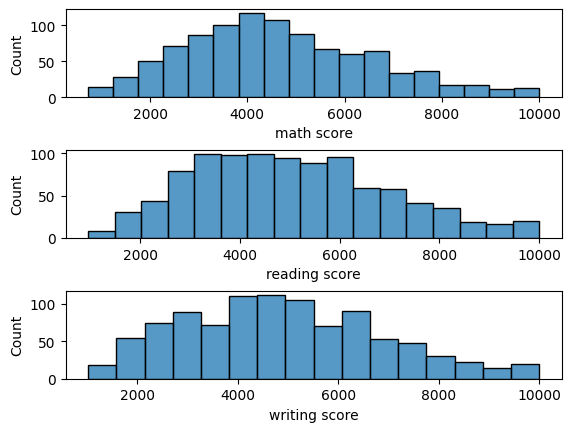

In [14]:
fig, axes = plt.subplots(3)
plt.subplots_adjust(hspace=0.6)
sn.histplot(df['math score'], ax=axes[0])
sn.histplot(df['reading score'], ax=axes[1])
sn.histplot(df['writing score'], ax=axes[2])

In [15]:
# converted the right skewed distribution to normal distribution